## Regularized logistic regression

In [3]:
%cd c:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex2\\ex2
%pwd

c:\Users\s\Downloads\machine_learning\machine-learning-ex2\ex2


'c:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex2\\ex2'

### Visualizing the data

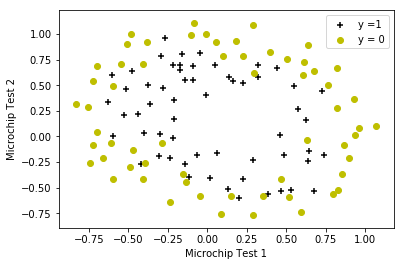

In [4]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('ex2data2.txt', delimiter=',')
x0 = data[:, 0:2]
y0 = data[:, -1][:, np.newaxis]

pos = np.where(y0.flatten() == 1)
neg = np.where(y0.flatten() == 0)

plt.figure(111)
plt.scatter(x0[pos, 0], x0[pos, 1], color='black', marker='+', label='y =1')
plt.scatter(x0[neg, 0], x0[neg, 1], color='y', marker='o', label='y = 0')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='best')
plt.show()

### Feature mapping

In [43]:
def map_feature(x_1, x_2):
    degree = 6
    out = np.ones((x_1.shape[0], 1))
    for i in np.arange(1, degree + 1, 1):
        for j in np.arange(0, i + 1, 1):
            feature = (x_1 ** (i - j)) * (x_2 ** j)
            out = np.hstack((out, feature))
            
    return out

x_reg = map_feature(x0[:, 0:1], x0[:, 1:2])
print(x_reg.shape)

(118, 28)


### Cost function and gradient

In [20]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    
    return g


def cost_func_reg(theta, x, y, reg):
    theta_1 = theta[1:, :]
    m = x.shape[0]
    j = -1 * np.sum(y * (np.log(sigmoid(x.dot(theta)))) + (1 - y) * (np.log(1 - sigmoid(x.dot(theta))))) / m + reg / (2 * m) * theta_1.T.dot(theta_1)
    grad = (x.T.dot(sigmoid(x.dot(theta)) - y)) / m
    grad[1:, :] += reg / m * theta_1
    
    return j, grad


initial_theta = np.zeros((x_reg.shape[1], 1))
reg0 = 1
cost0, grad0 = cost_func_reg(initial_theta, x_reg, y0, reg0)
print('Cost at initial theta (zeros):\n', cost0)
print('Gradient at initial theta (zeros) - first five values only:')
print(grad0[0:5])

Cost at initial theta (zeros):
 [[0.69314718]]
Gradient at initial theta (zeros) - first five values only:
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


### Advanced optimization

In [24]:
from scipy import optimize


def f(theta, x, y, reg):
    theta = theta.reshape(-1, 1)
    theta_1 = theta[1:, :]
    m = x.shape[0]
    j = -1 * np.sum(y * (np.log(sigmoid(x.dot(theta)))) + (1 - y) * (np.log(1 - sigmoid(x.dot(theta))))) / m + reg / (2 * m) * theta_1.T.dot(theta_1)
    
    return j


def jac(theta, x, y, reg):
    theta = theta.reshape(-1, 1)
    theta_1 = theta[1:, :]
    m = x.shape[0]
    grad = (x.T.dot(sigmoid(x.dot(theta)) - y)) / m
    grad[1:, :] += reg / m * theta_1
    
    return grad.ravel()

res = optimize.minimize(fun=f, x0=initial_theta.ravel(), args=(x_reg, y0, reg0), method='CG', jac=jac)
print(res)

     fun: 0.5290027310062194
     jac: array([-2.94796744e-07, -1.51981240e-06,  2.34227002e-06,  1.85216621e-06,
       -2.39379244e-06,  4.28881429e-06, -1.35441427e-06,  1.53200342e-06,
       -1.93771602e-07,  7.98178999e-07, -1.50253078e-07, -1.50619987e-06,
        4.86209617e-07, -9.80416629e-07,  1.85525819e-06, -1.27803998e-06,
        7.29820866e-07, -6.57849557e-07,  3.56952614e-07, -2.89426711e-08,
       -2.66123515e-07, -8.48676498e-07, -7.48056251e-07,  1.26071908e-07,
       -6.66924216e-07,  2.79431390e-07, -6.00948024e-07,  2.20222613e-07])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 19
    njev: 55
  status: 0
 success: True
       x: array([ 1.2726322 ,  0.62526851,  1.18110054, -2.01977776, -0.91750969,
       -1.43140105,  0.12396937, -0.36542088, -0.35720348, -0.17516018,
       -1.45817405, -0.05109747, -0.61556197, -0.2747374 , -1.19275643,
       -0.24225813, -0.20594332, -0.04478629, -0.27777193, -0.29534671,
       -0.45647333, -

### Plotting the decision boundary

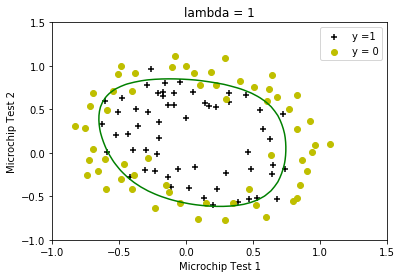

In [56]:
x1 = np.linspace(-1, 1.5, 50)
x2 = np.linspace(-1, 1.5, 50)
xx1, xx2 = np.meshgrid(x1, x2)
xx_reg = map_feature(xx1.ravel().reshape(-1, 1), xx2.ravel().reshape(-1, 1))
h = sigmoid(xx_reg.dot(res.x)).reshape(50, 50)

plt.figure(111)
plt.scatter(x0[pos, 0], x0[pos, 1], color='black', marker='+', label='y =1')
plt.scatter(x0[neg, 0], x0[neg, 1], color='y', marker='o', label='y = 0')
plt.contour(xx1, xx2, h, [0.5], colors='green')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='best')
plt.title('lambda = 1')
plt.show()
